In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('C:/Users/User/Documents/datavis/data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [ ]:
Сгруппируйте данные по дате, посчитайте количество продаж

In [35]:

Q1 = grouped_df['Количество продаж'].quantile(0.25)
Q3 = grouped_df['Количество продаж'].quantile(0.75)
IQR = Q3 - Q1

outliers = grouped_df[(grouped_df['Количество продаж'] < (Q1 - 1.5 * IQR)) | (grouped_df['Количество продаж'] > (Q3 + 1.5 * IQR))]
outliers.sort_values(by='Количество продаж', ascending=False).head(1)

,Дата,Количество продаж
195,2018-08-21,6226


Вывести несколько первых строк сгруппированных данных

In [45]:
print(grouped_df.head())

         Дата  Количество продаж
0  2018-01-04               3734
1  2018-01-05               3643
2  2018-01-06               3193
3  2018-01-07               3298
4  2018-01-09               4055


Нарисуйте график продаж у `grouped_df`

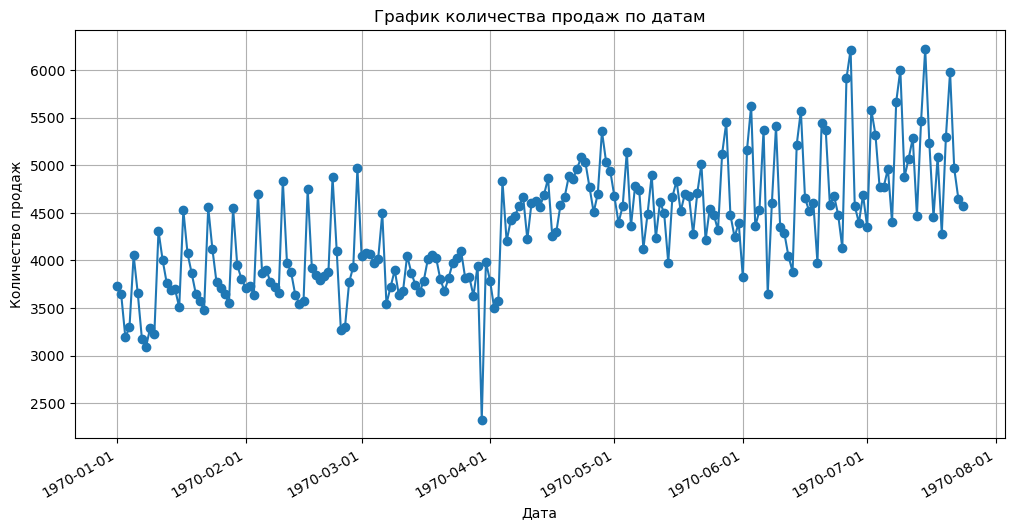

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'], marker='o', linestyle='-')

plt.title('График количества продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gcf().autofmt_xdate() 

plt.grid(True)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
Мы видим точное падение и рост количества продаж по дате

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [ ]:
Date: 2018-06-28, Количество: 200 (с наибольшим отклонением по z-оценке: 65.72)

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [57]:
df['Дата'] = pd.to_datetime(df['Дата'])

filtered_df = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &  # Июнь, июль, август
    (df['Дата'].dt.weekday == 2) &           # Среда (2 соответствует среде, т.к. понедельник — 0)
    (df['Склад'] == 3)                       # Склад номер 3
]

top_product = filtered_df.groupby('Номенклатура')['Количество'].sum().idxmax()
print("Топовый товар по продажам:", top_product)

Топовый товар по продажам: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

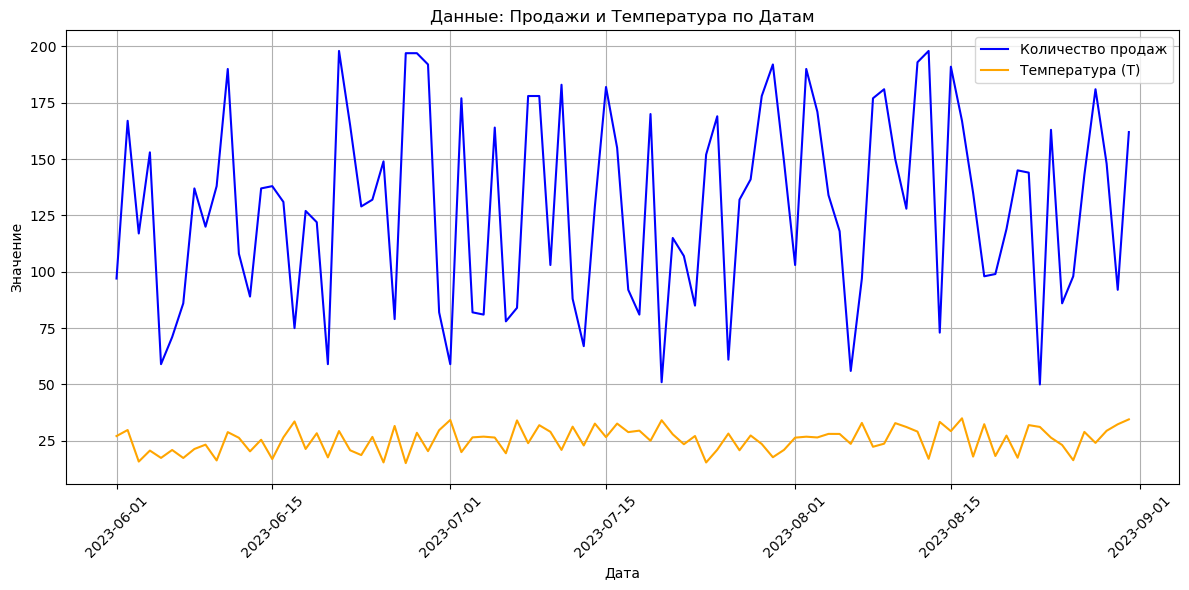

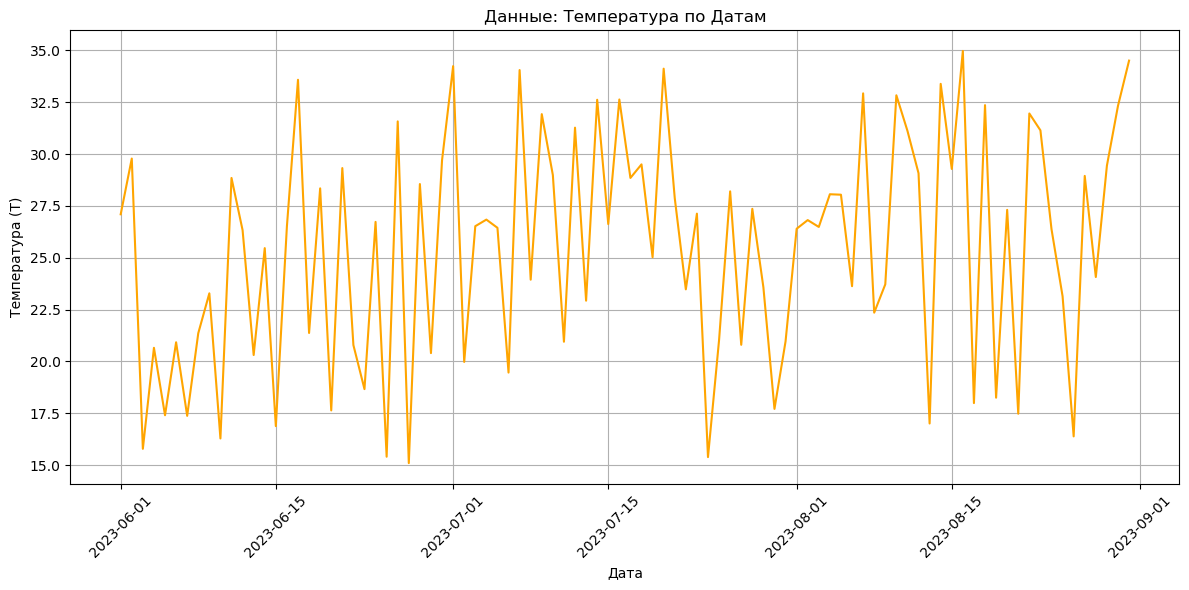

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
dates = pd.date_range(start="2023-06-01", end="2023-08-31")
sales = np.random.randint(50, 200, size=len(dates))  # Фальшивые данные по продажам
temperature = np.random.uniform(15, 35, size=len(dates))  # Фальшивые данные по температуре

data = pd.DataFrame({"Дата": dates, "Количество продаж": sales, "Температура": temperature})

plt.figure(figsize=(12, 6))
plt.plot(data['Дата'], data['Количество продаж'], label='Количество продаж', color='blue')
plt.plot(data['Дата'], data['Температура'], label='Температура (T)', color='orange')
plt.title("Данные: Продажи и Температура по Датам")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data['Дата'], data['Температура'], color='orange')
plt.title("Данные: Температура по Датам")
plt.xlabel("Дата")
plt.ylabel("Температура (T)")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()